# EDA on Netflix Original Films

## Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

## Loading and Preprocessing Data

In [2]:
# load csv data
df = pd.read_csv('NetflixOriginals.csv')

# clean data - remove rows with blank data
df = df.replace(' ', np.nan)
df.dropna(inplace=True)

# preprocess data
cols_to_convert = ['Title', 'Genre', 'Premiere', 'Language']
for col in cols_to_convert:
    df[col] = df[col].values.astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.9+ KB


***
## Histograms

### IMDB Score
The histogram is **multimodal**. For better or for worse, Netflix original films do not tend to receive a certain rating simply because they are Netflix productions.

***
### Runtime
The histogram is **multimodal**. The runtimes of Netflix original films vary a lot, with outliers also affecting the runtime histogram.

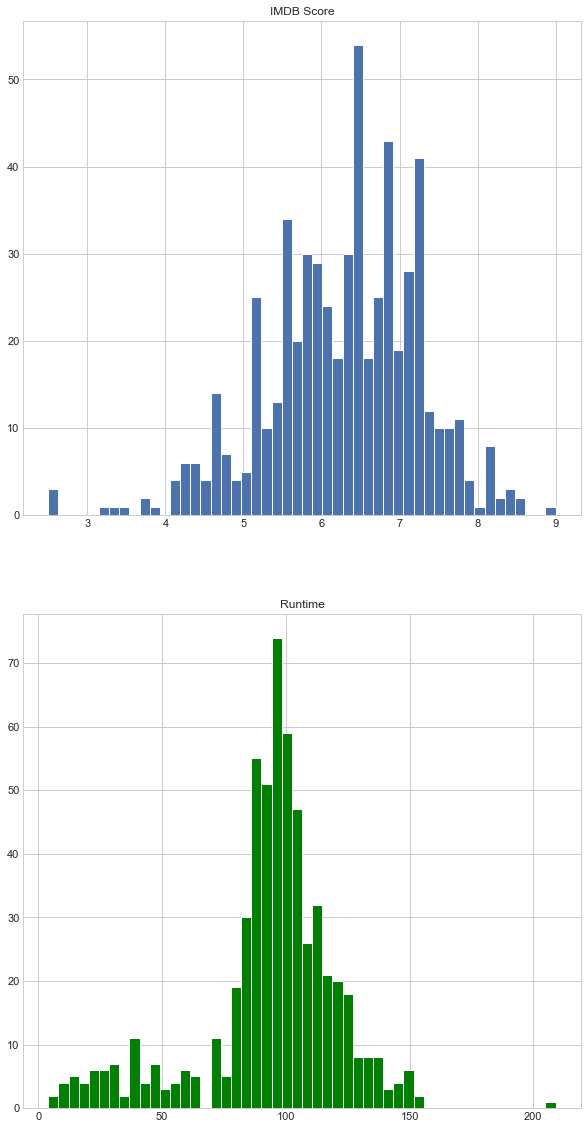

In [3]:
# histogram
plt.rcParams["figure.figsize"] = (10,20)

plt.subplot(2, 1, 1)
plt.hist(df['IMDB Score'], bins=50)
plt.title('IMDB Score')

plt.subplot(2, 1, 2)
plt.hist(df['Runtime'], bins=50, color='green')
plt.title('Runtime')

plt.show()

## Top 10 Languages Used in Netflix Originals
The pie chart shows the top 10 most used languages in Netflix original films. It can be seen that 75% of the Netflix originals were in English, and the remaining 75% are more or less equally distributed among the 9 other languages.

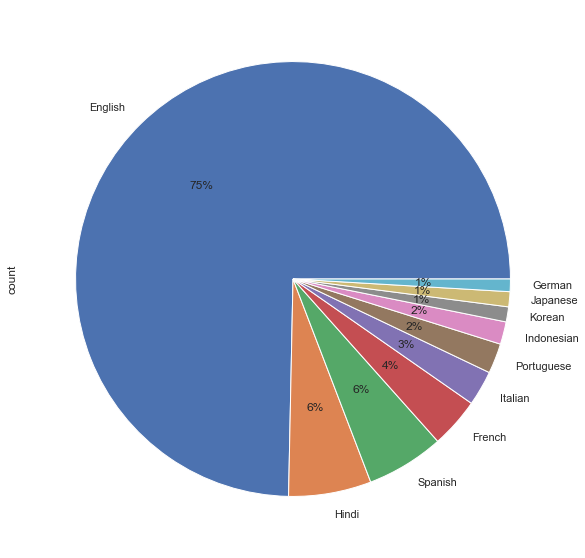

In [4]:
# top 10 languages
languages = df.groupby('Language').size().reset_index(name='count')
languages = languages.sort_values('count', ascending=False).head(10)
# languages

languages.plot.pie(y='count', figsize=(10, 10), labels=languages['Language'], autopct='%1.0f%%', legend=False)
plt.show()

***
## Top 10 Genres of Netflix Originals
The pie chart shows the top 10 genres in Netflix original films. It can be seen that the top 3 genres of the Netflix originals were documentaries (39%), dramas (19%), and comedy (12%).

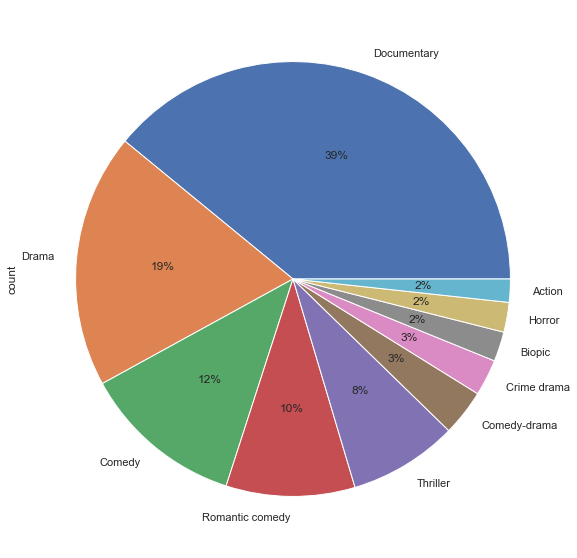

In [5]:
# top 10 genres
genres = df.groupby('Genre').size().reset_index(name='count')
genres = genres.sort_values('count', ascending=False).head(10)
genres

genres.plot.pie(y='count', figsize=(10, 10), labels=genres['Genre'], autopct='%1.0f%%', legend=False)
plt.show()

***
## Number of Films Released Per Year
The pie chart below shows the distribution of Netflix original films from 2014 to 2021, which is the scope of the dataset. It can be seen that the top 3 years with the most releases are:

* 2020 (31.34% | 183 films)
* 2019 (21.40% | 125 films)
* 2018 (16.95% | 99 films)

It should also be noted that, as of documenting, the data for 2021 is only until May 2021, yet it still is the 4th in the list with most films per year (12.16% | 71 films).

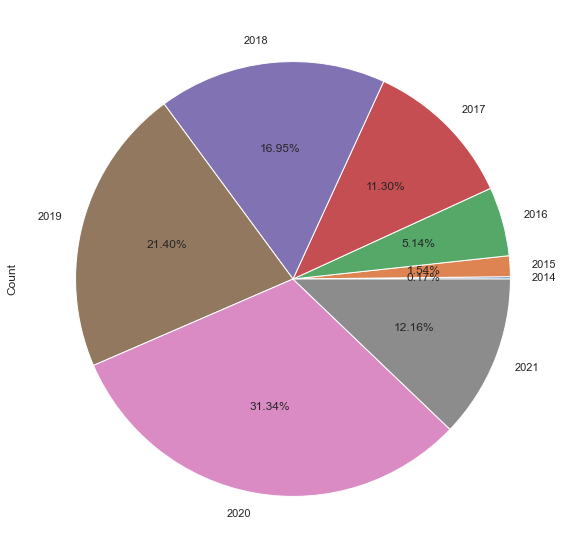

In [6]:
# get years of release
years = list(range(2014, 2022))
years_df = pd.DataFrame()
years_df["Year"] = years
counts = list()

for year in years:
    counts.append(df['Premiere'].str.count(str(year)).sum())
    
years_df['Count'] = counts

years_df.plot.pie(y='Count', figsize=(10, 10), labels=years_df['Year'], autopct='%.2f%%', legend=False)
plt.show()

***
## Top 10 Genres and Their Mean IMDB Score
The mean IMDB scores of the top 10 most occurrent genres were calculated. The table and bar chart are shown below for illustration and reference.

On average, the top 3 genres with the highest IMDB ratings (with respect to the 10 most occurrent genres) are:
* Documentary: 6.94
* Crime drama: 6.75
* Biopic: 6.4

In [7]:
# top 10 genre and imdb score
# mean of imdb scores

unique_genres = genres['Genre']

imdb_mean = list()

for genre in unique_genres:
    imdb_mean.append(df.loc[df['Genre'] == genre, 'IMDB Score'].mean())

genre_imdb_df = pd.DataFrame()
genre_imdb_df['Genre'] = unique_genres
genre_imdb_df['IMDB Score (Average)'] = imdb_mean
genre_imdb_df = genre_imdb_df.sort_values('IMDB Score (Average)', ascending=False)
genre_imdb_df

Genre  IMDB Score (Average)
45       Documentary              6.936478
41       Crime drama              6.745455
26            Biopic              6.400000
46             Drama              6.342857
36      Comedy-drama              6.214286
81   Romantic comedy              5.848718
106         Thriller              5.563636
32            Comedy              5.506122
0             Action              5.414286
60            Horror              5.255556

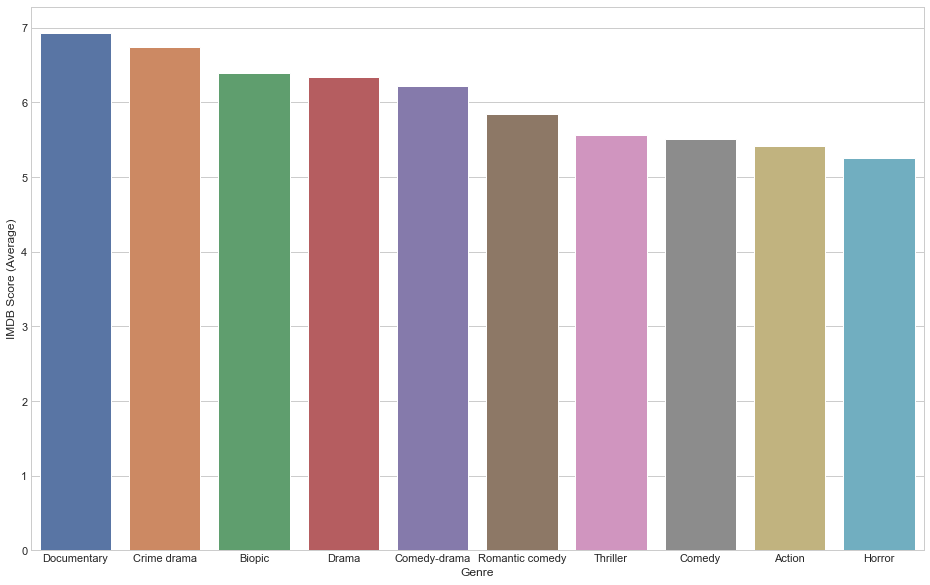

In [8]:
sns.barplot(data=genre_imdb_df, x="Genre",y="IMDB Score (Average)")
plt.gcf().set_size_inches(16, 10)
plt.show()

***
## Top 10 Genres and Their Mean Runtimes (in Minutes)
The mean runtimes of the top 10 most occurrent genres were calculated. The table and bar chart are shown below for illustration and reference.

On average, the top 3 genres with the longest runtimes (with respect to the 10 most occurrent genres) are:
* Crime drama: 118.18 minutes
* Action: 108 minutes
* Biopic: 107.31 minutes

In [9]:
runtime_mean = list()

for genre in unique_genres:
    runtime_mean.append(df.loc[df['Genre'] == genre, 'Runtime'].mean())

genre_runtime_df = pd.DataFrame()
genre_runtime_df['Genre'] = unique_genres
genre_runtime_df['Runtime (Average)'] = runtime_mean
genre_runtime_df = genre_runtime_df.sort_values('Runtime (Average)', ascending=False)
genre_runtime_df

Genre  Runtime (Average)
41       Crime drama         118.181818
0             Action         108.000000
26            Biopic         107.555556
46             Drama         107.311688
36      Comedy-drama         105.142857
106         Thriller         105.121212
81   Romantic comedy         100.692308
60            Horror          99.333333
32            Comedy          95.653061
45       Documentary          78.962264

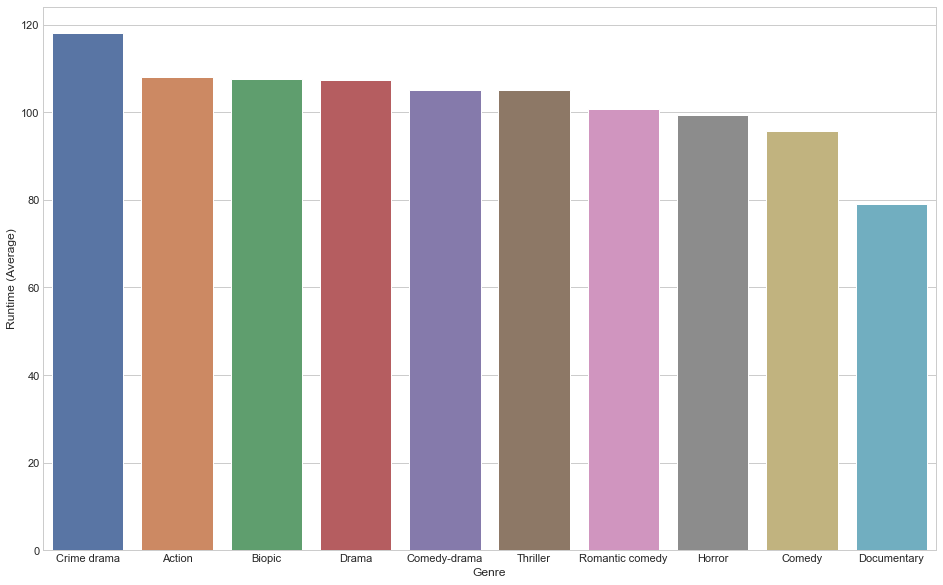

In [10]:
sns.barplot(data=genre_runtime_df, x="Genre",y="Runtime (Average)")
plt.gcf().set_size_inches(16, 10)
plt.show()